# Phase 2: Student Segmentation Analysis 🎓
## Objective
In this phase, we apply **Unsupervised Machine Learning** to group students based on their engagement and performance patterns. By identifying these segments, we can understand different learning behaviors within the gamified software testing course.

### Key Metrics Used:
* **Race Effectiveness:** Overall success score.
* **Race Active Time:** Total effort/time spent.
* **Race Number Executions:** Persistence through trials.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import os


In [3]:
# 0. Setup: Output directory for Phase 2 figures
output_dir = '../reports/figures'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Set visual style
sns.set_theme(style="whitegrid")



In [5]:
# 1. Load Data
# We use the feather format for speed
df = pd.read_feather('../data/gamification-software-testing-engagement-performance-test-effectiveness.feather')



In [7]:
# 2. Feature Selection
# We cluster students based on overall course performance and engagement
# Effectiveness: Success, Active Time: Effort, Number Executions: Persistence
features = ['Race Effectiveness', 'Race Active Time', 'Race Number Executions']
X = df[features].copy()



In [9]:
# 3. Scaling (Standardization)
# K-Means uses distance calculations, so features must be on the same scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



## Determining Optimal Clusters
Before clustering, we need to decide how many segments best represent our students. We use the **Elbow Method**, calculating the Within-Cluster Sum of Squares (WCSS).
* *Note: The "elbow" point indicates where adding another cluster doesn't significantly improve the model.*

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

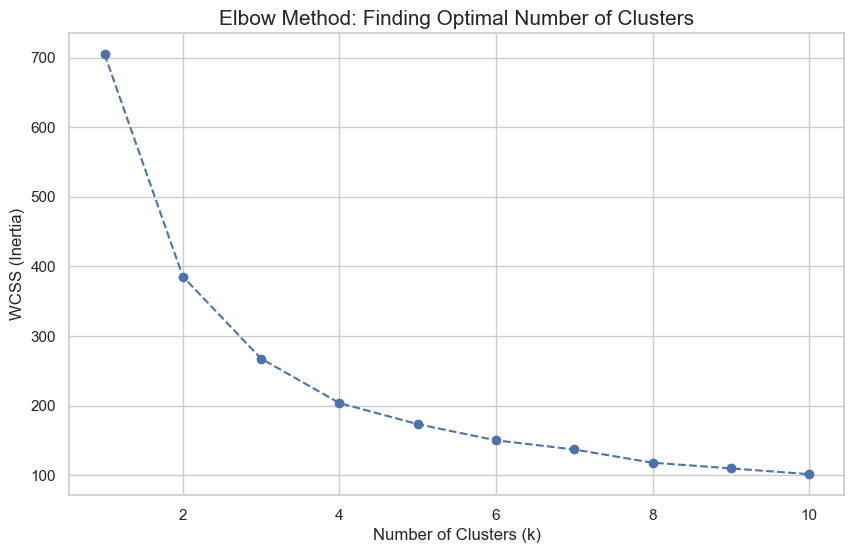

In [11]:
# 4. Elbow Method: Finding the Optimal Number of Clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', color='b', linestyle='--')
plt.title('Elbow Method: Finding Optimal Number of Clusters', fontsize=15)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('WCSS (Inertia)', fontsize=12)
plt.savefig(f'{output_dir}/04_elbow_method.png', dpi=300)
plt.show()

## Final Cluster Profiles & Analysis
Based on the mean values, we have identified three distinct student profiles:

### 1. 🏆 Cluster 1: "The Elite Grinders"
- **Characteristics:** Highest Effectiveness (97.1) and highest persistence (200.3 executions).
- **Behavior:** These students fully embrace the gamification loop, repeatedly executing tests until they reach mastery.

### 2. ⚡ Cluster 2: "The Efficient Achievers"
- **Characteristics:** High Effectiveness (94.1) with significantly fewer executions (71.3).
- **Behavior:** Highly efficient learners who achieve top scores with optimized effort.

### 3. ⚠️ Cluster 0: "The At-Risk / Disengaged"
- **Characteristics:** Low Effectiveness (55.2) and low active time (6.5).
- **Behavior:** This group shows signs of struggle or lack of interest. They are the primary targets for educational intervention.

In [13]:
# 5. Finalizing K-Means with the chosen number of clusters (Let's assume k=3)
optimal_k = 3 
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)



C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


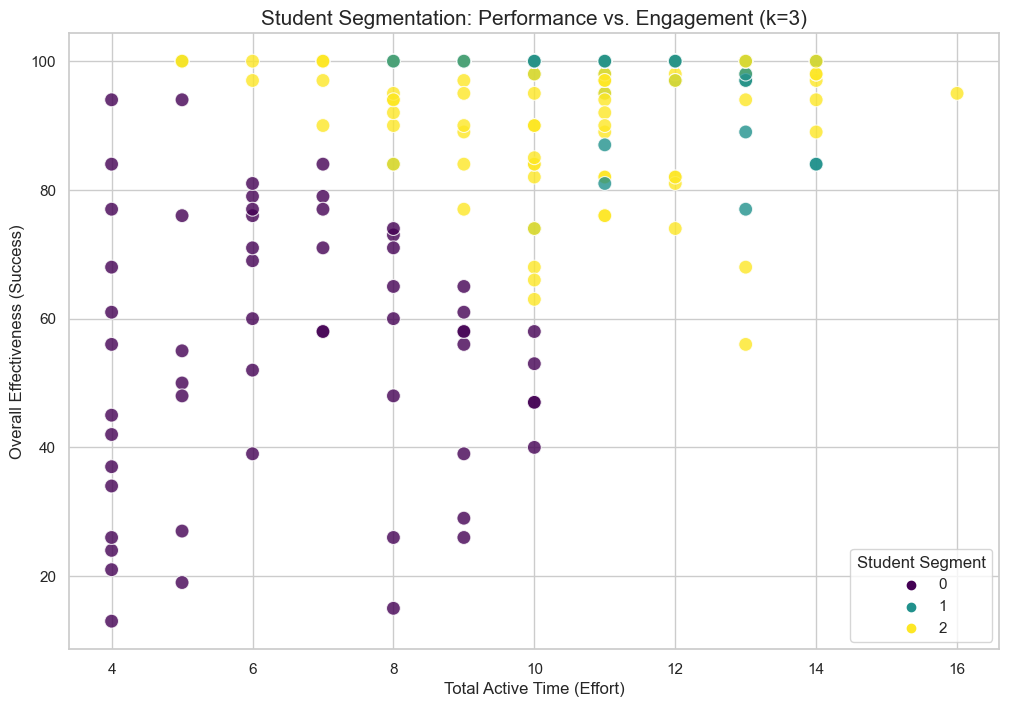

In [15]:
# 6. Visualizing the Clusters (Performance vs Effort)
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df, 
    x='Race Active Time', 
    y='Race Effectiveness', 
    hue='Cluster', 
    palette='viridis', 
    s=100, 
    alpha=0.8
)

plt.title(f'Student Segmentation: Performance vs. Engagement (k={optimal_k})', fontsize=15)
plt.xlabel('Total Active Time (Effort)', fontsize=12)
plt.ylabel('Overall Effectiveness (Success)', fontsize=12)
plt.legend(title='Student Segment')

# Save the segmentation result
plt.savefig(f'{output_dir}/05_student_segments_scatter.png', dpi=300, bbox_inches='tight')
plt.show()



In [17]:
# 7. Cluster Profiles: Understanding the characteristics of each group
cluster_profiles = df.groupby('Cluster')[features].mean()
print("Cluster Profiles (Mean values):")
print(cluster_profiles)

Cluster Profiles (Mean values):
         Race Effectiveness  Race Active Time  Race Number Executions
Cluster                                                              
0                 55.280702          6.543860               27.087719
1                 97.105263         11.368421              200.368421
2                 94.107438         10.504132               71.297521


## Conclusion
This segmentation proves that **high engagement (executions) directly correlates with elite performance** in this gamified environment. However, a significant group (Cluster 0) remains underperfomed, suggesting that gamification alone may not motivate every student.

**Next Step:** In Phase 3, we will perform a **Dropout Analysis** to see exactly where Cluster 0 students lose momentum.

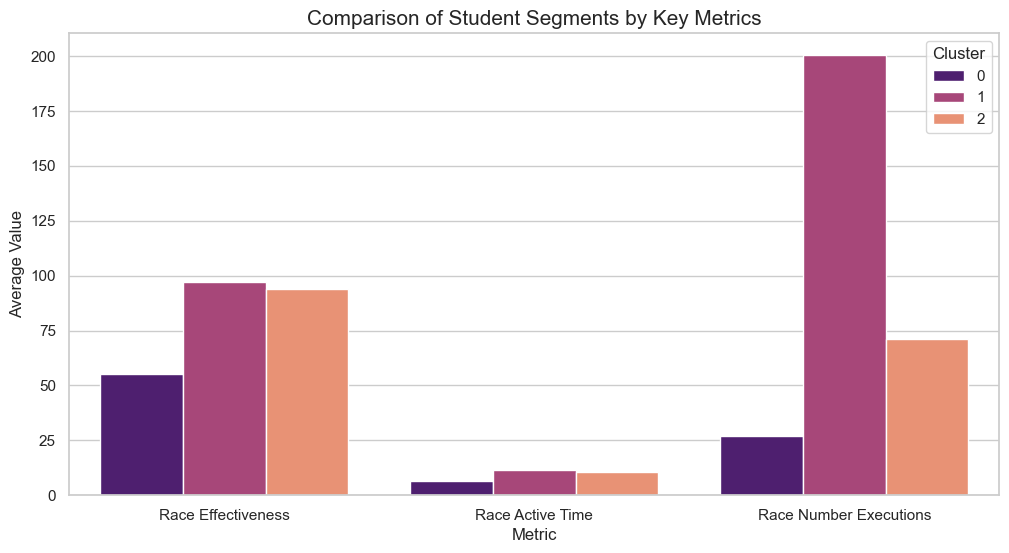

In [26]:
# 8. Visualizing Cluster Characteristics (Comparison)
# We will reshape the data to plot it easily
cluster_summary = df.groupby('Cluster')[features].mean().reset_index()
cluster_melted = cluster_summary.melt(id_vars='Cluster', var_name='Metric', value_name='Average Value')

plt.figure(figsize=(12, 6))
sns.barplot(data=cluster_melted, x='Metric', y='Average Value', hue='Cluster', palette='magma')
plt.title('Comparison of Student Segments by Key Metrics', fontsize=15)
plt.ylabel('Average Value')
plt.savefig(f'{output_dir}/06_cluster_comparison_bar.png', dpi=300)
plt.show()



### 📊 Visualizing Segment Differences
The bar chart above clearly illustrates the behavioral differences between the three clusters:
* **Cluster 1 (Elite Grinders):** Dominates the "Number of Executions" metric. Their success is driven by extreme persistence.
* **Cluster 2 (Efficient Achievers):** Shows high effectiveness but with much lower execution counts compared to Cluster 1, indicating high prior knowledge or faster learning curves.
* **Cluster 0 (At-Risk):** Lagging in all metrics, particularly in engagement (Active Time), which explains their lower effectiveness.

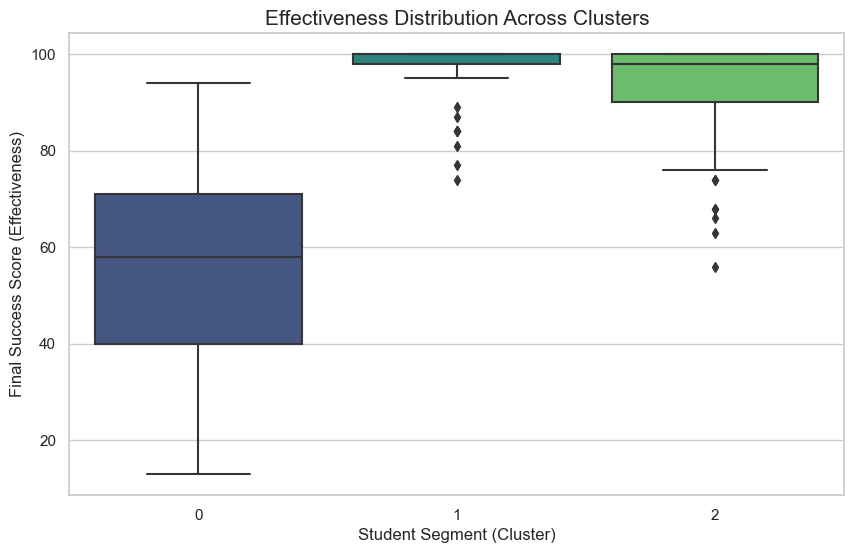

In [28]:
# 9. Box Plot: Effectiveness Distribution per Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Cluster', y='Race Effectiveness', palette='viridis')
plt.title('Effectiveness Distribution Across Clusters', fontsize=15)
plt.xlabel('Student Segment (Cluster)')
plt.ylabel('Final Success Score (Effectiveness)')
plt.savefig(f'{output_dir}/07_cluster_effectiveness_boxplot.png', dpi=300)
plt.show()

### 🎯 Effectiveness Distribution Analysis
The Box Plot provides insights into the stability of student performance within each cluster:
* **High Stability:** Cluster 1 and Cluster 2 have very tight distributions near the 90-100 range, meaning their performance is consistently high.
* **High Variance:** Cluster 0 shows a much wider range of scores. This suggests that while some students in this group are simply "disengaged," others might be "struggling" despite some effort.
* **Outliers:** Any points below the whiskers in Clusters 1 and 2 represent students who, despite being in a high-performing group, had a significant drop in one specific area.